In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import statsmodels.api as sm
from cmh import CMH
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Read CSV
df_1 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_1_choices.csv')
df_2 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_2_choices.csv')
df_3 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_3_choices.csv')
df_4 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_4_choices.csv')
df_5 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_5_choices.csv')
df_6 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_6_choices.csv')
df_7 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_7_choices.csv')
df_8 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_8_choices.csv')
df_9 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_9_choices.csv')
df_10 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_10_choices.csv')
df_11 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_11_choices.csv')
df_12 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_12_choices.csv')

In [3]:
# Filter
df_1 = df_1[df_1['user_id'] != 'tim']
df_2 = df_2[df_2['user_id'] != 'tim']
df_3 = df_3[df_3['user_id'] != 'tim']
df_4 = df_4[df_4['user_id'] != 'tim']
df_5 = df_5[df_5['user_id'] != 'tim']
df_6 = df_6[df_6['user_id'] != 'tim']
df_7 = df_7[df_7['user_id'] != 'tim']
df_8 = df_8[df_8['user_id'] != 'tim']
df_9 = df_9[df_9['user_id'] != 'tim']
df_10 = df_10[df_10['user_id'] != 'tim']
df_11 = df_11[df_11['user_id'] != 'tim']
df_12 = df_12[df_12['user_id'] != 'tim']

In [4]:
# Add patient column
df_1['patient'] = 1
df_2['patient'] = 2
df_3['patient'] = 3
df_4['patient'] = 4
df_5['patient'] = 5
df_6['patient'] = 6
df_7['patient'] = 7
df_8['patient'] = 8
df_9['patient'] = 9
df_10['patient'] = 10
df_11['patient'] = 11
df_12['patient'] = 12

In [5]:
# Concatenate the DataFrames
dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]
all_choices = pd.concat(dfs, ignore_index=True)

In [6]:
# Order of seeing CDSS (1) or SOC (2)
# a and b are opposites of each other
# a = 122121122112
# b = 211212211221
a_list = [1,2,2,1,2,1,1,2,2,1,1,2]
b_list = [2,1,1,2,1,2,2,1,1,2,2,1]

In [7]:
# Define if see cdss or soc
def view_fun(row):
    patient = row['patient']
    user_archetype = row['user_archetype']
    if user_archetype == 'a':
        view = a_list[patient-1]
    elif user_archetype == 'b':
        view = b_list[patient-1]
    if view == 1:
        return 'cdss'
    elif view == 2:
        return 'soc'

all_choices['view'] = all_choices.apply(lambda row: view_fun(row), axis=1)

In [8]:
all_choices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         505 non-null    object
 1   user_archetype  505 non-null    object
 2   switch_choice   505 non-null    object
 3   explanation     498 non-null    object
 4   patient         505 non-null    int64 
 5   view            505 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


In [9]:
all_choices

,user_id,user_archetype,switch_choice,explanation,patient,view
0,0,a,dont_switch,"temps increasing, systolics dropping, still on...",1,cdss
1,1,b,dont_switch,The respiratory rates are increasing.,1,soc
2,2,a,dont_switch,30 hours is not long enough to assess for resp...,1,cdss
3,3,b,dont_switch,"Raised inflammatory markers (raised CRP, RR>20",1,soc
4,4,a,dont_switch,Based on CURB score the patient is at least CU...,1,cdss
...,...,...,...,...,...,...
500,37,b,dont_switch,"low gas, need to ensure safe oral can be taken...",12,cdss
501,38,a,dont_switch,"reduced GCS, unlikely will tolerate an oral",12,soc
502,39,b,switch,Concerning features here are the low GCS. Assu...,12,cdss
503,40,a,dont_switch,Given low grade fever and reduced GCS - need m...,12,soc


In [8]:
# Add demographics 
demographics = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/demographic_results/demographics_processed.csv')
all_choices['user_id'] = all_choices['user_id'].astype(int)
all_choices = pd.merge(all_choices, demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])

In [9]:
all_choices

,user_id,user_archetype,switch_choice,explanation,patient,view,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
0,0,a,dont_switch,"temps increasing, systolics dropping, still on...",1,cdss,30s,Male,Pharmacist,Other,NaN
1,0,a,switch,"apyrexial, HR returned to normal",2,soc,30s,Male,Pharmacist,Other,NaN
2,0,a,dont_switch,"temp and HR increasing, GCS dropped in last 24...",3,soc,30s,Male,Pharmacist,Other,NaN
3,0,a,switch,"temps and other vitals all ok, and have been s...",4,cdss,30s,Male,Pharmacist,Other,NaN
4,0,a,switch,all vitals in range,5,soc,30s,Male,Pharmacist,Other,NaN
...,...,...,...,...,...,...,...,...,...,...,...
500,41,b,dont_switch,"Not enough info to decide, tachypnic and tachy...",8,cdss,20s,Female,Other,Other,Slightly familiar
501,41,b,switch,"stable news score, if clinically well and bloo...",9,cdss,20s,Female,Other,Other,Slightly familiar
502,41,b,dont_switch,"tachypnic, hypotensive,low spo2, either change...",10,soc,20s,Female,Other,Other,Slightly familiar
503,41,b,dont_switch,news score,11,soc,20s,Female,Other,Other,Slightly familiar


# Entropy

In [12]:
# Calculate entropy for each patient
def entropy(proportions):
    return -np.sum(proportions * np.log2(proportions + 1e-9), axis=1)

# Summarize switch_choice for each patient
summary = all_choices.groupby(['patient', 'switch_choice']).size().unstack(fill_value=0)
proportions = summary.div(summary.sum(axis=1), axis=0)
proportions

entropy_values = entropy(proportions)
print("Entropy values for each patient:")
print(entropy_values.round(2))

switch_choice,dont_switch,switch
patient,,
1,1.000000,0.000000
2,0.047619,0.952381
3,0.767442,0.232558
4,0.047619,0.952381
5,0.047619,0.952381
6,0.095238,0.904762
7,0.476190,0.523810
8,0.404762,0.595238
9,0.119048,0.880952


Entropy values for each patient:
patient
1    -0.00
2     0.28
3     0.78
4     0.28
5     0.28
6     0.45
7     1.00
8     0.97
9     0.53
10    1.00
11    1.00
12    0.94
dtype: float64


In [13]:
from scipy.stats import entropy
entropy(proportions, axis=1, base=2)

array([0.        , 0.27619543, 0.78244413, 0.27619543, 0.27619543,
       0.45371634, 0.99836367, 0.97366806, 0.52661707, 0.99836367,
       0.99836367, 0.94028596])

In [14]:
# Calculate Gini-Simpson index for each patient
def gini_simpson(proportions):
    return 1 - np.sum(proportions**2, axis=1)

gini_simpson_values = gini_simpson(proportions)
print("Gini-Simpson index values for each patient:")
print(gini_simpson_values.round(2))

Gini-Simpson index values for each patient:
patient
1     0.00
2     0.09
3     0.36
4     0.09
5     0.09
6     0.17
7     0.50
8     0.48
9     0.21
10    0.50
11    0.50
12    0.46
dtype: float64


In [15]:
all_choices['view'].value_counts()
all_choices['switch_choice'].value_counts()
all_choices['patient'].value_counts()
all_choices.groupby('view')['switch_choice'].value_counts()

view
cdss    253
soc     252
Name: count, dtype: int64

switch_choice
switch         311
dont_switch    194
Name: count, dtype: int64

patient
3     43
1     42
2     42
4     42
5     42
6     42
7     42
8     42
9     42
10    42
11    42
12    42
Name: count, dtype: int64

view  switch_choice
cdss  switch           145
      dont_switch      108
soc   switch           166
      dont_switch       86
Name: count, dtype: int64

In [16]:
all_choices.groupby(['patient', 'view'])['switch_choice'].value_counts()

patient  view  switch_choice
1        cdss  dont_switch      21
         soc   dont_switch      21
2        cdss  switch           21
         soc   switch           19
               dont_switch       2
3        cdss  dont_switch      18
               switch            4
         soc   dont_switch      15
               switch            6
4        cdss  switch           19
               dont_switch       2
         soc   switch           21
5        cdss  switch           21
         soc   switch           19
               dont_switch       2
6        cdss  switch           17
               dont_switch       4
         soc   switch           21
7        cdss  dont_switch      15
               switch            6
         soc   switch           16
               dont_switch       5
8        cdss  switch           13
               dont_switch       8
         soc   switch           12
               dont_switch       9
9        cdss  switch           19
               dont_switch

In [17]:
filtered_all_choices = all_choices[(all_choices['patient'] == 7)|(all_choices['patient'] == 6)|(all_choices['patient'] == 10)]
filtered_all_choices = filtered_all_choices[(filtered_all_choices['view'] == 'cdss')&(filtered_all_choices['switch_choice'] == 'dont_switch')]
len(filtered_all_choices)
filtered_all_choices.user_id.unique()

32

array([ 0,  2,  4,  6,  8, 10, 12, 14, 18, 20, 22, 28, 32, 34, 36, 38, 40])

# Chi-squared

In [10]:
# Contingency table
contingency_table = pd.crosstab(all_choices['view'], all_choices['switch_choice'])
#contingency_table = pd.crosstab(all_choices['switch_choice'], all_choices['view'])
contingency_table
# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square: {chi2}, p-value: {p}, dof: {dof}")

switch_choice,dont_switch,switch
view,,
cdss,108,145
soc,86,166


Chi-square: 3.5574032609428228, p-value: 0.05928040701589782, dof: 1


In [11]:
# Subset the data for the specific patient
subset_df = all_choices[all_choices['patient'] == 7]
# Contingency table
contingency_table = pd.crosstab(subset_df['view'], subset_df['switch_choice'])
contingency_table
# Subset the data for the specific patient
subset_df = all_choices[all_choices['patient'] == 6]
# Contingency table
contingency_table = pd.crosstab(subset_df['view'], subset_df['switch_choice'])
contingency_table
# Subset the data for the specific patient
subset_df = all_choices[all_choices['patient'] == 10]
# Contingency table
contingency_table = pd.crosstab(subset_df['view'], subset_df['switch_choice'])
contingency_table

switch_choice,dont_switch,switch
view,,
cdss,15,6
soc,5,16


switch_choice,dont_switch,switch
view,,
cdss,4,17
soc,0,21


switch_choice,dont_switch,switch
view,,
cdss,13,8
soc,7,14


In [20]:
contingency_table = np.array([[4, 16], [0, 19]])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=2.340183270676692, pvalue=0.12607472050247887, dof=1, expected_freq=array([[ 2.05128205, 17.94871795],
       [ 1.94871795, 17.05128205]]))

In [21]:
contingency_table = np.array([[4, 16], [0, 20]])
chi2_contingency(contingency_table) #correction=False

Chi2ContingencyResult(statistic=2.5, pvalue=0.11384629800665763, dof=1, expected_freq=array([[ 2., 18.],
       [ 2., 18.]]))

In [22]:
contingency_table = np.array([[12, 6], [8, 13]])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=2.1265507518797007, pvalue=0.14476619644361305, dof=1, expected_freq=array([[ 9.23076923,  8.76923077],
       [10.76923077, 10.23076923]]))

In [82]:
# Loop through each unique patient
for patient in all_choices['patient'].unique():
    # Subset the data for the specific patient
    subset_df = all_choices[all_choices['patient'] == patient]
    
    # Contingency table
    contingency_table = pd.crosstab(subset_df['view'], subset_df['switch_choice'])
    
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Patient: {patient}")
    print(f"Chi-square: {round(chi2, 2)}, p-value: {round(p, 3)}")
    if p < 0.05:
        print(f"  -> The differences are statistically significant.\n")
    else:
        print(f"  -> The differences are ***NOT*** statistically significant.\n")
    print("-" * 30)

Patient: 1
Chi-square: 0.0, p-value: 1.0
  -> The differences are ***NOT*** statistically significant.

------------------------------
Patient: 2
Chi-square: 0.52, p-value: 0.469
  -> The differences are ***NOT*** statistically significant.

------------------------------
Patient: 3
Chi-square: 0.2, p-value: 0.656
  -> The differences are ***NOT*** statistically significant.

------------------------------
Patient: 4
Chi-square: 0.52, p-value: 0.469
  -> The differences are ***NOT*** statistically significant.

------------------------------
Patient: 5
Chi-square: 0.52, p-value: 0.469
  -> The differences are ***NOT*** statistically significant.

------------------------------
Patient: 6
Chi-square: 2.49, p-value: 0.115
  -> The differences are ***NOT*** statistically significant.

------------------------------
Patient: 7
Chi-square: 7.73, p-value: 0.005
  -> The differences are statistically significant.

------------------------------
Patient: 8
Chi-square: 0.0, p-value: 1.0
  -> Th

In [25]:
all_choices.columns

Index(['user_id', 'user_archetype', 'switch_choice', 'explanation', 'patient',
       'view', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new',
       'ai_familiarity_new'],
      dtype='object')

In [26]:
# Loop through each demographic
demographic_list = ['age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
for demographic in demographic_list:
    # Contingency table
    contingency_table = pd.crosstab(all_choices[demographic], all_choices['switch_choice'])
    
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Demographic: {demographic}")
    print(f"Chi-square: {chi2}, p-value: {p}")
    if p < 0.05:
        print(f"  -> The differences in are statistically significant.\n")
    else:
        print(f"  -> The differences in are ***NOT*** statistically significant.\n")
    print("-" * 30)

Demographic: age_new
Chi-square: 4.300270310831767, p-value: 0.366891249760708
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Demographic: sex_new
Chi-square: 0.07320599375719096, p-value: 0.7867248012856328
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Demographic: medical_speciality_new
Chi-square: 5.940108023706294, p-value: 0.11456073732185736
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Demographic: grade_new
Chi-square: 1.9188979876888492, p-value: 0.16597819641228712
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Demographic: ai_familiarity_new
Chi-square: 3.64599027004002, p-value: 0.3023154056171411
  -> The differences in are ***NOT*** statistically significant.

------------------------------


In [27]:
# Loop through each unique patient
for patient in all_choices['patient'].unique():
    # Loop through each demographic
    demographic_list = ['age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
    for demographic in demographic_list:
        # Subset the data for the specific patient
        subset_df = all_choices[all_choices['patient'] == patient]
        # Contingency table
        contingency_table = pd.crosstab(subset_df[demographic], subset_df['switch_choice'])
        
        # Chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:
            print(f"Patient: {patient}")
            print(f"Demographic: {demographic}")
            print(f"Chi-square: {chi2}, p-value: {p}")
            print(f"  -> The differences in are statistically significant.\n")
        #else:
        #    print(f"  -> The differences in are ***NOT*** statistically significant.\n")
        #print("-" * 30)
print('Done')

Done


In [28]:
# Filter for demographics and test

# Loop through each demographic
demographic_list = ['age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
for demographic in demographic_list:
    for group in all_choices[demographic].unique():
        if group == group: # Filter out nan
            sub_df = all_choices[all_choices[demographic] == group]
            # Contingency table
            contingency_table = pd.crosstab(sub_df['view'], sub_df['switch_choice'])
            
            # Chi-square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            if p < 0.05:
                print(f"Demographic: {demographic}")
                print(f"group: {group}")
                print(f"Chi-square: {chi2}, p-value: {p}")
                print(f"  -> The differences in are statistically significant.\n")
            #else:
            #    print(f"  -> The differences in are ***NOT*** statistically significant.\n")
            #print("-" * 30)
print('Done')


Done


In [29]:
# Filter for demographics and test for specific patients

# Loop through each demographic
demographic_list = ['age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
for demographic in demographic_list:
    for group in all_choices[demographic].unique():
        if group == group: # Filter out nan
            # Loop through each unique patient
            for patient in all_choices['patient'].unique():
                # Subset the data for the specific patient
                subset_df = all_choices[all_choices['patient'] == patient]
                sub_df = subset_df[subset_df[demographic] == group]
                # Contingency table
                contingency_table = pd.crosstab(sub_df['view'], sub_df['switch_choice'])
                
                # Chi-square test
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                if p < 0.05:
                    print(f"Patient: {patient}")
                    print(f"Demographic: {demographic}")
                    print(f"group: {group}")
                    print(f"Chi-square: {chi2}, p-value: {p}")
                    print(f"  -> The differences in are statistically significant.\n")
                    print(contingency_table)
                #else:
                #    print(f"  -> The differences in are ***NOT*** statistically significant.\n")
                #print("-" * 30)
print('Done')

Patient: 10
Demographic: sex_new
group: Female
Chi-square: 4.024373708677687, p-value: 0.04484726818500072
  -> The differences in are statistically significant.

switch_choice  dont_switch  switch
view                              
cdss                     6       2
soc                      2       9
Patient: 7
Demographic: grade_new
group: Consultant
Chi-square: 5.749220521541949, p-value: 0.016495974568838657
  -> The differences in are statistically significant.

switch_choice  dont_switch  switch
view                              
cdss                    10       4
soc                      2      10
Patient: 7
Demographic: ai_familiarity_new
group: Slightly familiar
Chi-square: 4.743303571428573, p-value: 0.02941253950828421
  -> The differences in are statistically significant.

switch_choice  dont_switch  switch
view                              
cdss                     8       2
soc                      1       6
Done


# Plot

<Axes: xlabel='view', ylabel='switch_choice'>

Text(0.5, 1.0, 'Heatmap of Switch Choice by View')

Text(0.5, 606.7222222222223, 'View')

Text(158.08159722222223, 0.5, 'Switch Choice')

<Axes: xlabel='switch_choice'>

Text(0.5, 1.0, 'Stacked Bar Chart of Switch Choice by View')

Text(0.5, 606.7222222222223, 'Switch Choice')

Text(784.1881313131312, 0.5, 'Frequency')

(<Figure size 1500x1200 with 7 Axes>,
 {('dont_switch', 'cdss'): (0.0, 0.0, 0.38224717994187485, 0.5548515258416961),
  ('dont_switch', 'soc'): (0.0,
   0.5581737849779086,
   0.38224717994187485,
   0.44182621502209124),
  ('switch', 'cdss'): (0.3872223043199843,
   0.0,
   0.6127776956800158,
   0.46468897885932203),
  ('switch', 'soc'): (0.3872223043199843,
   0.4680112379955347,
   0.6127776956800158,
   0.5319887620044652)})

Text(0.5, 1.0, 'Mosaic Plot of Switch Choice by View')

Text(0.5, 102.72222222222219, 'View')

Text(150.09722222222223, 0.5, 'Switch Choice')

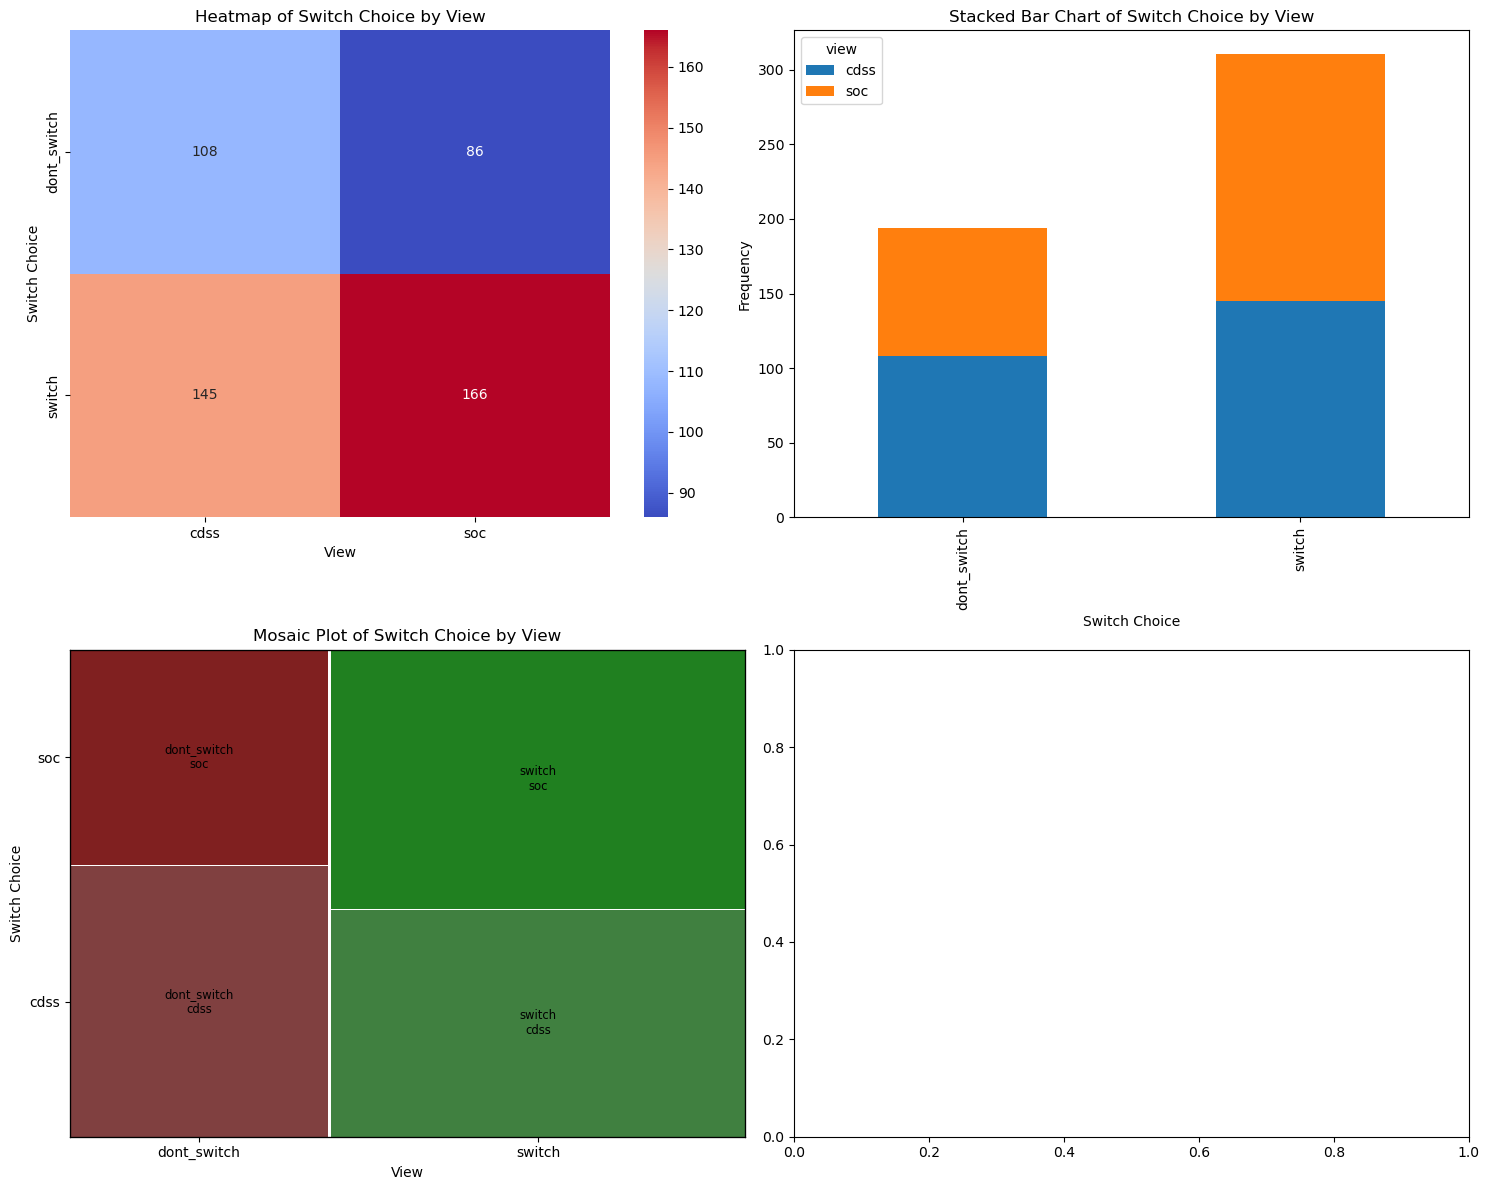

In [30]:
# Example contingency table
contingency_table = pd.crosstab(all_choices['switch_choice'], all_choices['view'])

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', ax=axs[0, 0])
axs[0, 0].set_title('Heatmap of Switch Choice by View')
axs[0, 0].set_xlabel('View')
axs[0, 0].set_ylabel('Switch Choice')

# Stacked Bar Chart
contingency_table.plot(kind='bar', stacked=True, ax=axs[0, 1])
axs[0, 1].set_title('Stacked Bar Chart of Switch Choice by View')
axs[0, 1].set_xlabel('Switch Choice')
axs[0, 1].set_ylabel('Frequency')

# Mosaic Plot
contingency_dict = contingency_table.stack().reset_index().set_index(['switch_choice', 'view'])[0].to_dict()
mosaic(contingency_dict, ax=axs[1, 0])
axs[1, 0].set_title('Mosaic Plot of Switch Choice by View')
axs[1, 0].set_xlabel('View')
axs[1, 0].set_ylabel('Switch Choice')

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
all_choices.groupby(['patient', 'view'])['switch_choice'].value_counts()

patient  view  switch_choice
1        cdss  dont_switch      21
         soc   dont_switch      21
2        cdss  switch           21
         soc   switch           19
               dont_switch       2
3        cdss  dont_switch      18
               switch            4
         soc   dont_switch      15
               switch            6
4        cdss  switch           19
               dont_switch       2
         soc   switch           21
5        cdss  switch           21
         soc   switch           19
               dont_switch       2
6        cdss  switch           17
               dont_switch       4
         soc   switch           21
7        cdss  dont_switch      15
               switch            6
         soc   switch           16
               dont_switch       5
8        cdss  switch           13
               dont_switch       8
         soc   switch           12
               dont_switch       9
9        cdss  switch           19
               dont_switch

<Axes: xlabel='view', ylabel='switch_choice'>

Text(0.5, 1.0, 'Heatmap of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(158.08159722222223, 0.5, 'Switch Choice')

<Axes: xlabel='view'>

Text(0.5, 1.0, 'Stacked Bar Chart of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(784.1881313131312, 0.5, 'Frequency')

[Text(0, 0, 'soc'), Text(1, 0, 'cdss')]

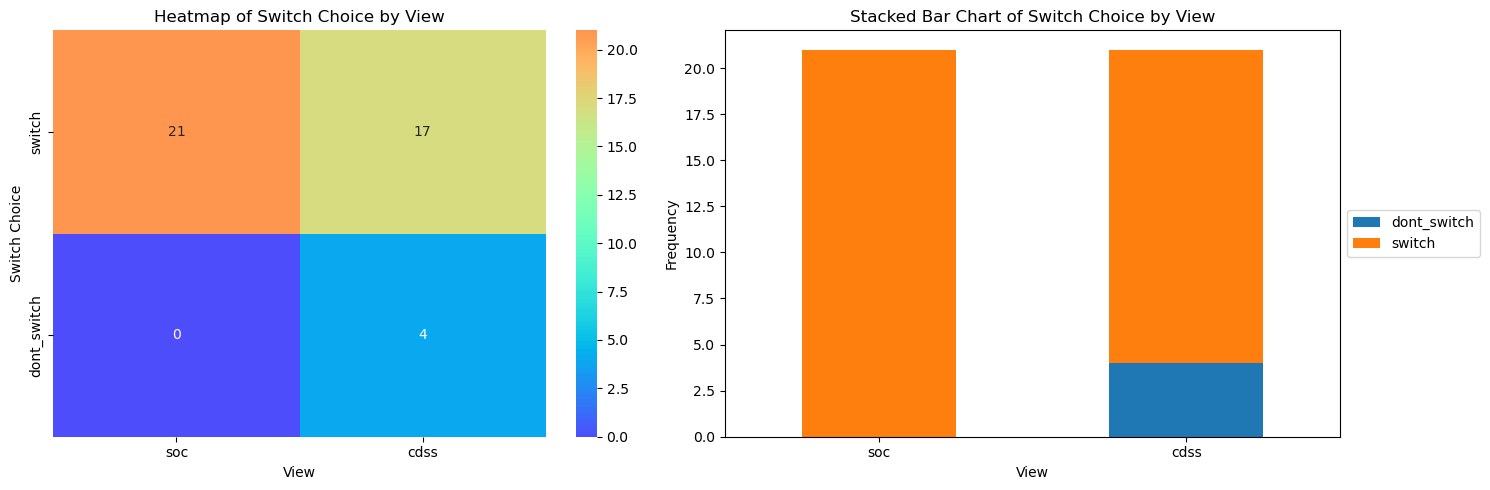

In [32]:
from matplotlib.colors import LinearSegmentedColormap

# Patient 6
contingency_table = pd.crosstab(all_choices[all_choices['patient'] == 6]['switch_choice'], all_choices[all_choices['patient'] == 6]['view'])

# Function to truncate a colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'truncated_cmap', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Choose a colormap and truncate it to focus on the central part
original_cmap = plt.get_cmap('rainbow')
truncated_cmap = truncate_colormap(original_cmap, 0.1, 0.8)

# Reorder soc and cdss
col = contingency_table.pop('soc')
contingency_table.insert(0, col.name, col)

# Fig
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap
sns.heatmap(contingency_table.reindex(["switch", "dont_switch"]), annot=True, fmt='d', cmap=truncated_cmap, ax=axs[0])
axs[0].set_title('Heatmap of Switch Choice by View')
axs[0].set_xlabel('View')
axs[0].set_ylabel('Switch Choice')

# Stacked Bar Chart
contingency_table.T.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Stacked Bar Chart of Switch Choice by View')
axs[1].set_xlabel('View')
axs[1].set_ylabel('Frequency')

# Place legend outside the plot
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# Rotate x labels
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)


# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='view', ylabel='switch_choice'>

Text(0.5, 1.0, 'Heatmap of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(158.08159722222223, 0.5, 'Switch Choice')

<Axes: xlabel='view'>

Text(0.5, 1.0, 'Stacked Bar Chart of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(784.1881313131312, 0.5, 'Frequency')

[Text(0, 0, 'soc'), Text(1, 0, 'cdss')]

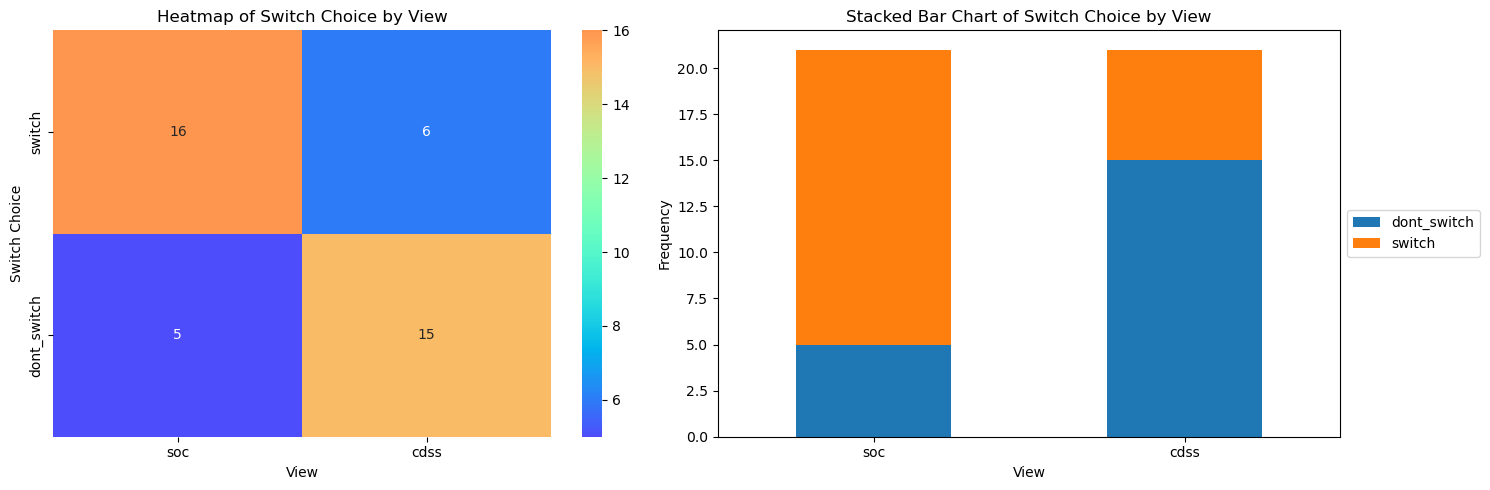

In [33]:
from matplotlib.colors import LinearSegmentedColormap

# Patient 7
contingency_table = pd.crosstab(all_choices[all_choices['patient'] == 7]['switch_choice'], all_choices[all_choices['patient'] == 7]['view'])

# Function to truncate a colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'truncated_cmap', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Choose a colormap and truncate it to focus on the central part
original_cmap = plt.get_cmap('rainbow')
truncated_cmap = truncate_colormap(original_cmap, 0.1, 0.8)

# Reorder soc and cdss
col = contingency_table.pop('soc')
contingency_table.insert(0, col.name, col)

# Fig
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap
sns.heatmap(contingency_table.reindex(["switch", "dont_switch"]), annot=True, fmt='d', cmap=truncated_cmap, ax=axs[0])
axs[0].set_title('Heatmap of Switch Choice by View')
axs[0].set_xlabel('View')
axs[0].set_ylabel('Switch Choice')

# Stacked Bar Chart
contingency_table.T.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Stacked Bar Chart of Switch Choice by View')
axs[1].set_xlabel('View')
axs[1].set_ylabel('Frequency')

# Place legend outside the plot
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# Rotate x labels
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)


# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='view', ylabel='switch_choice'>

Text(0.5, 1.0, 'Heatmap of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(158.08159722222223, 0.5, 'Switch Choice')

<Axes: xlabel='view'>

Text(0.5, 1.0, 'Stacked Bar Chart of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(784.1881313131312, 0.5, 'Frequency')

[Text(0, 0, 'soc'), Text(1, 0, 'cdss')]

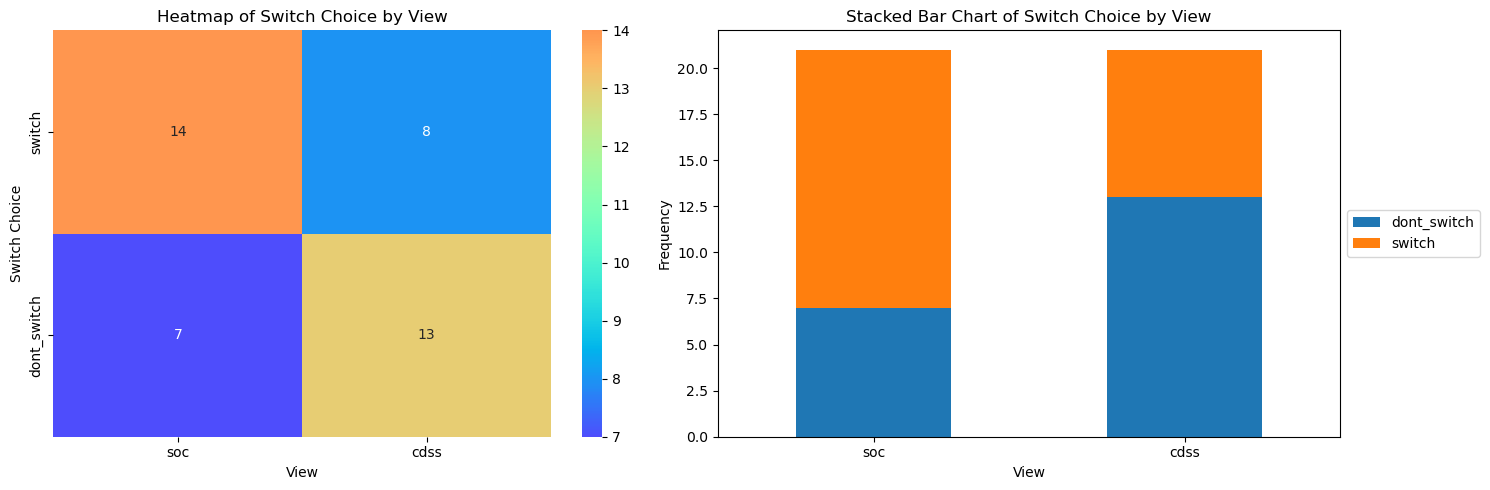

In [34]:
from matplotlib.colors import LinearSegmentedColormap

# Patient 10
contingency_table = pd.crosstab(all_choices[all_choices['patient'] == 10]['switch_choice'], all_choices[all_choices['patient'] == 10]['view'])

# Function to truncate a colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'truncated_cmap', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Choose a colormap and truncate it to focus on the central part
original_cmap = plt.get_cmap('rainbow')
truncated_cmap = truncate_colormap(original_cmap, 0.1, 0.8)

# Reorder soc and cdss
col = contingency_table.pop('soc')
contingency_table.insert(0, col.name, col)

# Fig
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap
sns.heatmap(contingency_table.reindex(["switch", "dont_switch"]), annot=True, fmt='d', cmap=truncated_cmap, ax=axs[0])
axs[0].set_title('Heatmap of Switch Choice by View')
axs[0].set_xlabel('View')
axs[0].set_ylabel('Switch Choice')

# Stacked Bar Chart
contingency_table.T.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Stacked Bar Chart of Switch Choice by View')
axs[1].set_xlabel('View')
axs[1].set_ylabel('Frequency')

# Place legend outside the plot
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# Rotate x labels
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)


# Adjust layout
plt.tight_layout()
plt.show()

In [79]:
def plot_contingency_tables(ctables, titles):
    # Function to truncate a colormap
    def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
        new_cmap = LinearSegmentedColormap.from_list(
            'truncated_cmap', cmap(np.linspace(minval, maxval, n)))
        return new_cmap

    # Choose a colormap and truncate it to focus on the central part
    original_cmap = plt.get_cmap('rainbow')
    truncated_cmap = truncate_colormap(original_cmap, 0.2, 1)

    # Create a 3x2 grid of subplots
    fig, axs = plt.subplots(3, 2, figsize=(18, 15))
    axs = axs.flatten()  # Flatten the axes array for easy indexing

    for i, contingency_table in enumerate(ctables):
        # Reorder columns so 'soc' is first if it exists
        if 'SOC' in contingency_table.columns:
            col = contingency_table.pop('SOC')
            contingency_table.insert(0, 'SOC', col)

        # Heatmap
        sns.heatmap(
            contingency_table.reindex(["Switch", "Dont switch"]), 
            annot=True, fmt='d', cmap=truncated_cmap, 
            ax=axs[2 * i], 
            vmin=0, vmax=25,  # Set cbar limits
            cbar_kws={'label': 'Count', 'shrink': 0.8},
            annot_kws={"size": 12} 
        )
        axs[2 * i].set_title(f'Heatmap of switch decisions by scenario for {titles[i]}', fontsize=14)
        axs[2 * i].set_xlabel('Scenario', fontsize=12)
        axs[2 * i].set_ylabel('Switch Choice', fontsize=12)
        #cbar = axs[2 * i].collections[0].colorbar
        #cbar.ax.tick_params(labelsize=10)

        # Stacked Bar Chart
        contingency_table.T.plot(kind='bar', stacked=True, ax=axs[2 * i + 1])
        axs[2 * i + 1].set_title(f'Stacked bar chart of switch decisions by scenario for {titles[i]}', fontsize=14)
        axs[2 * i + 1].set_xlabel('Scenario', fontsize=12)
        axs[2 * i + 1].set_ylabel('Frequency', fontsize=12)
        axs[2 * i + 1].set_ylim(0, 21)  # Set y-axis limit for bar chart
        axs[2 * i + 1].set_yticks(np.arange(0, 21, 5))

        # Increase tick label size
        axs[2 * i].tick_params(axis='x', labelsize=10)
        axs[2 * i].tick_params(axis='y', labelsize=10)
        axs[2 * i + 1].tick_params(axis='x', labelsize=10)
        axs[2 * i + 1].tick_params(axis='y', labelsize=10)

        # Remove legend
        axs[2 * i + 1].get_legend().remove()
        # Place legend outside the plot
        #handles, labels = axs[2 * i + 1].get_legend_handles_labels()
        #axs[2 * i + 1].legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
        # Rotate x labels
        axs[2 * i + 1].set_xticklabels(['SOC', 'CDSS'], rotation=0)

    # Remove any unused subplots if less than 6 plots
    for j in range(len(ctables) * 2, len(axs)):
        fig.delaxes(axs[j])

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.25)
    plt.show()

In [73]:
pd.crosstab(plot_df[plot_df['patient'] == 6]['switch_choice'], plot_df[plot_df['patient'] == 6]['view'])

view,cdss,soc
switch_choice,,
Dont switch,4,0
Switch,17,21


In [72]:
contingency_table_6

,SOC,CDSS
switch_choice,,
Dont switch,4,0
Switch,17,21


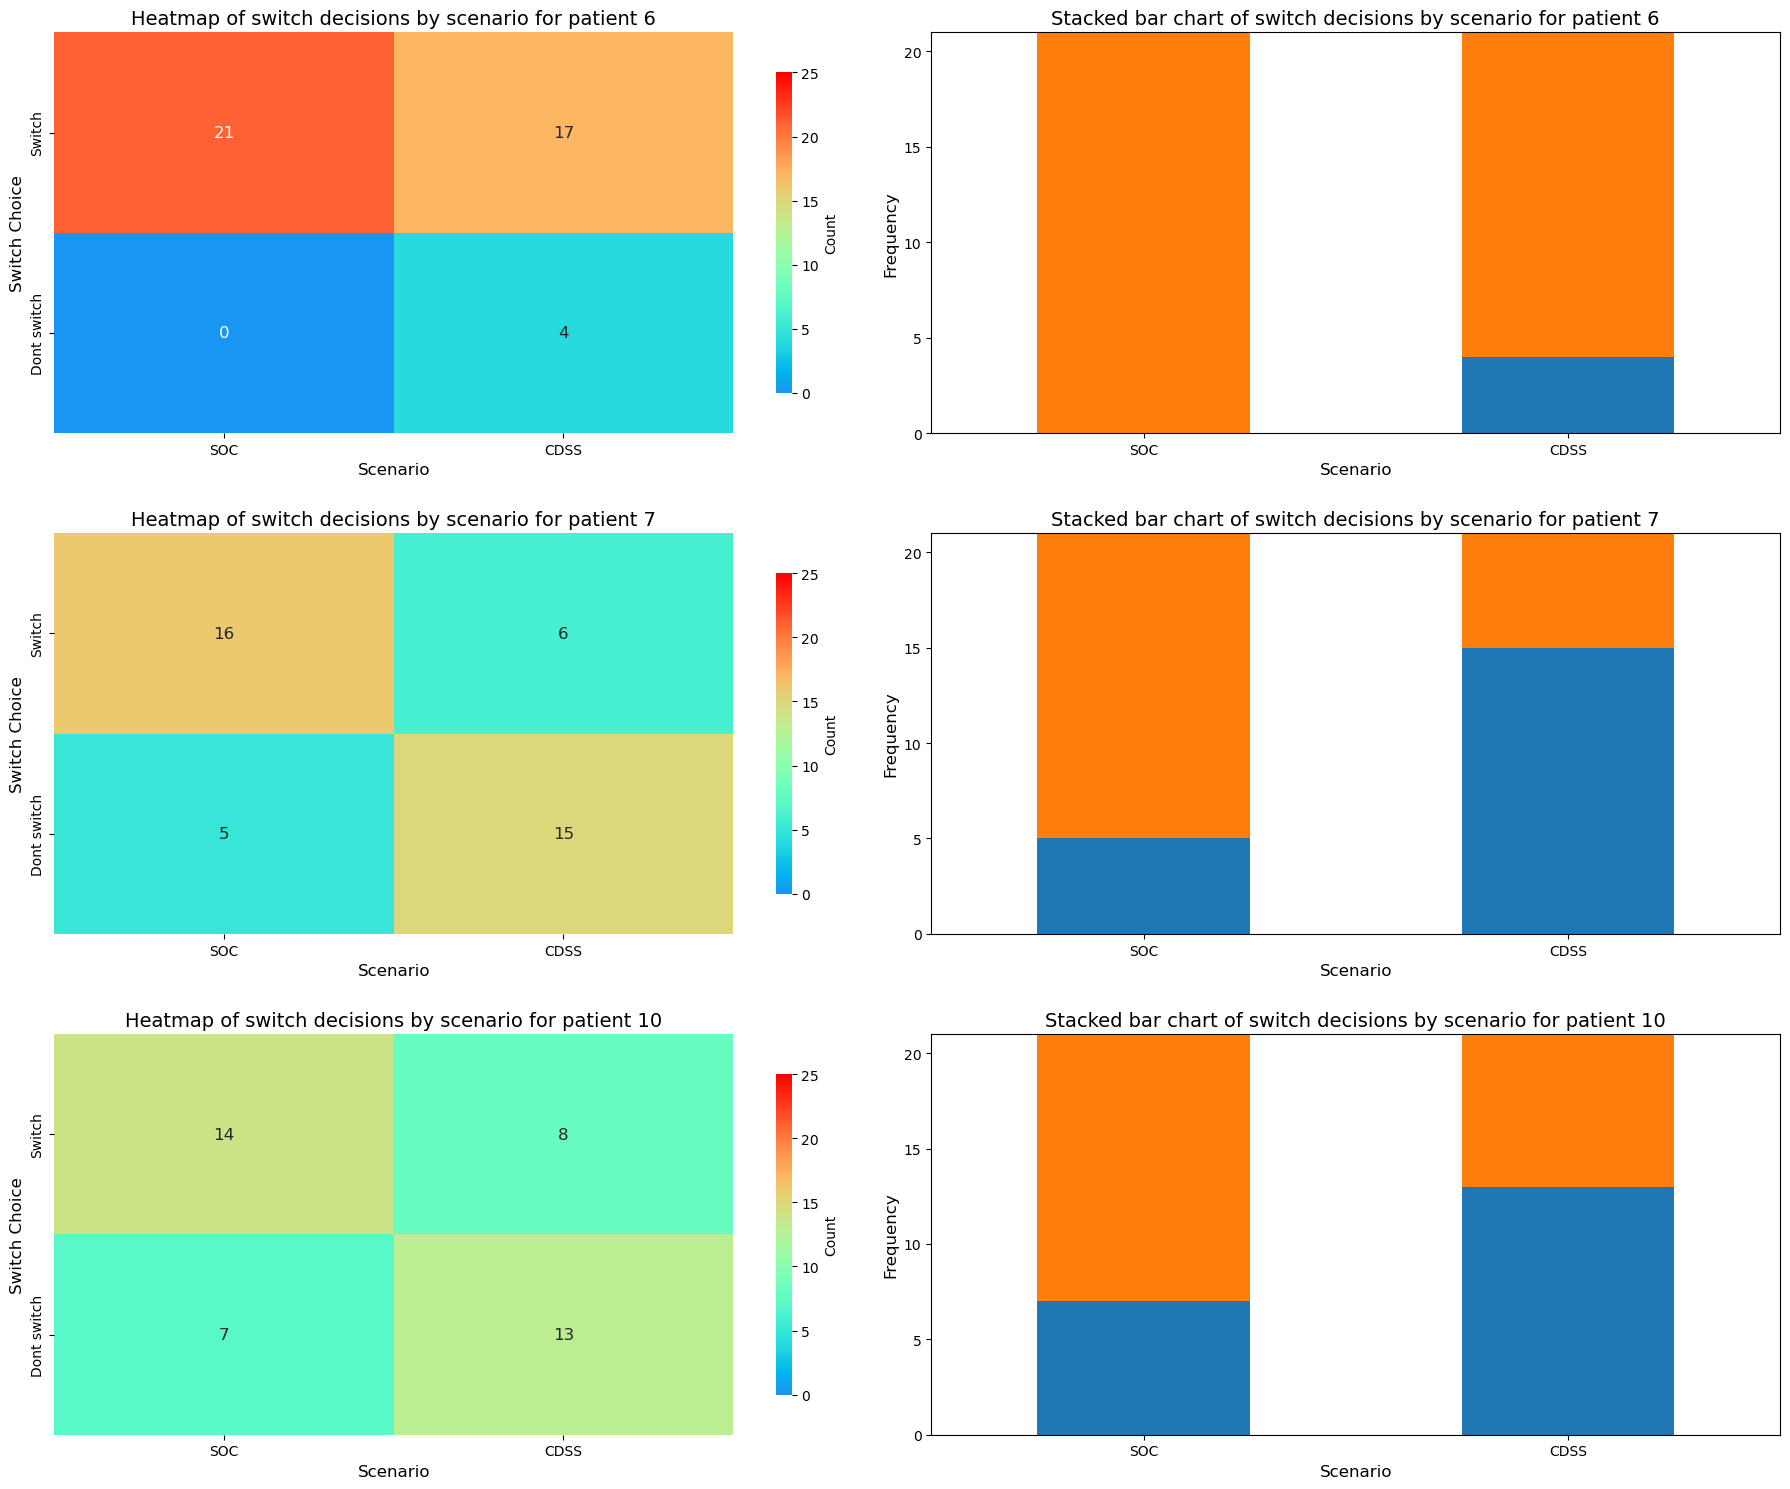

In [80]:
# contingency_tables
plot_df = all_choices.copy()
plot_df['switch_choice'] = plot_df['switch_choice'].replace('switch', 'Switch')
plot_df['switch_choice'] = plot_df['switch_choice'].replace('dont_switch', 'Dont switch')
contingency_table_6 = pd.crosstab(plot_df[plot_df['patient'] == 6]['switch_choice'], plot_df[plot_df['patient'] == 6]['view'])
contingency_table_7 = pd.crosstab(plot_df[plot_df['patient'] == 7]['switch_choice'], plot_df[plot_df['patient'] == 7]['view'])
contingency_table_10 = pd.crosstab(plot_df[plot_df['patient'] == 10]['switch_choice'], plot_df[plot_df['patient'] == 10]['view'])
contingency_table_6.columns = [['CDSS', 'SOC']]
contingency_table_7.columns = [['CDSS', 'SOC']]
contingency_table_10.columns = [['CDSS', 'SOC']]
ctables = [contingency_table_6, contingency_table_7, contingency_table_10]
titles = ["patient 6", "patient 7", "patient 10"]
plot_contingency_tables(ctables, titles)

# Others

In [ ]:
# Cant get this to work atm

# Define contingency table
contingency_table = pd.crosstab(all_choices['switch_choice'], all_choices['view'])

# Fit a log-linear model
exog, endog = sm.add_constant(all_choices['view']), all_choices['switch_choice']
mod = sm.GLM(endog, exog, family=sm.families.Poisson ,link=sm.families.links.log)
res = mod.fit()

# Summary of the results
print(res.summary())

In [84]:
# Function for Cochran-Mantel-Haenszel test
def cmh_test(df, exposure, outcome, stratify_by):
    #print(stratify_by)
    tables = []
    
    for stratify_level in df[stratify_by].unique():
        if stratify_level == stratify_level: # remove nan
            subset = df[df[stratify_by] == stratify_level]
            table = pd.crosstab(subset[exposure], subset[outcome])
            tables.append(table.values)
    #print(tables)
    
    # Sum tables across stratification levels
    summed_table = sum(tables)
    #print(summed_table)
    
    # Perform Chi-Square Test on the summed table
    chi2, p, dof, expected = chi2_contingency(summed_table, correction=False)
    
    return chi2, p, tables, summed_table

In [36]:
# Loop through each demographic
demographic_list = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
for demographic in demographic_list:
    chi2, p, tables, summed_table = cmh_test(all_choices, 'view', 'switch_choice', demographic)
    print(f"Cochran-Mantel-Haenszel Chi2: {chi2}, p-value: {p}")

Cochran-Mantel-Haenszel Chi2: 3.9108869289811317, p-value: 0.047974272631445
Cochran-Mantel-Haenszel Chi2: 4.036620833018416, p-value: 0.04452288774709584
Cochran-Mantel-Haenszel Chi2: 3.9108869289811317, p-value: 0.047974272631445
Cochran-Mantel-Haenszel Chi2: 3.9108869289811317, p-value: 0.047974272631445
Cochran-Mantel-Haenszel Chi2: 3.9108869289811317, p-value: 0.047974272631445
Cochran-Mantel-Haenszel Chi2: 3.955414407505854, p-value: 0.046720813059684146


In [86]:
# Loop through each unique patient
for patient in all_choices['patient'].unique():
    # Subset the data for the specific patient
    subset_df = all_choices[all_choices['patient'] == patient]
    # Loop through each demographic
    demographic_list = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
    for demographic in demographic_list:
        chi2, p, tables, summed_table = cmh_test(subset_df, 'view', 'switch_choice', demographic)
        if p < 0.05:
            print(f"Patient: {patient}")
            print(f"Demographic: {demographic}")
            print(f"Cochran-Mantel-Haenszel Chi-square: {round(chi2, 2)}, p-value: {round(p, 3)}")
            print(f"  -> The differences in are statistically significant.\n")
            print(tables)
            print(summed_table)
print('Done')

Patient: 6
Demographic: sex_new
Cochran-Mantel-Haenszel Chi-square: 4.42, p-value: 0.035
  -> The differences in are statistically significant.

[array([[ 2, 11],
       [ 0, 10]]), array([[ 2,  6],
       [ 0, 11]])]
[[ 4 17]
 [ 0 21]]
Patient: 6
Demographic: grade_new
Cochran-Mantel-Haenszel Chi-square: 4.42, p-value: 0.035
  -> The differences in are statistically significant.

[array([[2, 5],
       [0, 9]]), array([[ 2, 12],
       [ 0, 12]])]
[[ 4 17]
 [ 0 21]]
Patient: 7
Demographic: age_new
Cochran-Mantel-Haenszel Chi-square: 8.79, p-value: 0.003
  -> The differences in are statistically significant.

[array([[8, 1],
       [3, 5]]), array([[3, 2],
       [1, 6]]), array([[1, 2],
       [1, 2]]), array([[1, 1],
       [0, 2]]), array([[1, 0],
       [0, 1]])]
[[14  6]
 [ 5 16]]
Patient: 7
Demographic: sex_new
Cochran-Mantel-Haenszel Chi-square: 9.55, p-value: 0.002
  -> The differences in are statistically significant.

[array([[9, 4],
       [2, 8]]), array([[6, 2],
       [3,

In [38]:
chi2, p, tables, summed_table = cmh_test(all_choices, 'view', 'switch_choice', 'patient')
print(f"Cochran-Mantel-Haenszel Chi2: {chi2}, p-value: {p}")

Cochran-Mantel-Haenszel Chi2: 3.7423214993451865, p-value: 0.05305068997589548


# LR

In [39]:
# Create a mapping dictionary
view_mapping = {'cdss': 1, 'soc': 0, '1': 1, '0': 0}
switch_choice_mapping = {'switch': 1, 'dont_switch': 0, '1': 1, '0': 0}

# Map categorical values to numeric
all_choices['view_binary'] = all_choices['view'].map(view_mapping).astype('int')
all_choices['switch_choice_binary'] = all_choices['switch_choice'].map(switch_choice_mapping).astype('int')

In [40]:
# Logistic regression model
X = all_choices['view_binary']
y = all_choices['switch_choice_binary']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the model
logit_model = sm.Logit(y, X).fit(disp=0)

# Model summary
print(logit_model.summary())

                            Logit Regression Results                            
Dep. Variable:     switch_choice_binary   No. Observations:                  505
Model:                            Logit   Df Residuals:                      503
Method:                             MLE   Df Model:                            1
Date:                  Mon, 19 Aug 2024   Pseudo R-squ.:                0.005823
Time:                          12:48:54   Log-Likelihood:                -334.40
converged:                         True   LL-Null:                       -336.36
Covariance Type:              nonrobust   LLR p-value:                   0.04779
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6576      0.133      4.950      0.000       0.397       0.918
view_binary    -0.3630      0.184     -1.974      0.048      -0.723      -0.003


LLR p-value:
LLR p-value: 0.04584 - This is the p-value for the likelihood ratio test, which tests whether your model with predictors is significantly better than a model with no predictors. A p-value less than 0.05 indicates that your model is statistically significant.

Interpretation of Coefficient for view_binary
Coefficient (coef): -0.4206
The negative coefficient for view_binary means that an increase in the value of view_binary is associated with a decrease in the log odds of the outcome switch_choice_binary being 1.
To interpret this in terms of odds ratio:
Odds Ratio: exp(coef)=exp(−0.4206)≈0.657
The odds of switch_choice_binary being 1 are about 65.7% of the odds when view_binary is 0. In other words, if view_binary changes from 0 to 1, the odds of switch_choice_binary being 1 decrease by approximately 34.3%.
Significance (P>|z|): 0.047

The p-value is less than 0.05, which indicates that the effect of view_binary on switch_choice_binary is statistically significant.
Summary
Intercept: Significant, but its practical interpretation depends on the context of switch_choice_binary.
view_binary: Has a statistically significant negative effect on switch_choice_binary, suggesting that when view_binary increases, the probability of switch_choice_binary being 1 decreases.

In [41]:
# Loop through each unique patient
for patient in all_choices['patient'].unique():
    # Subset the data for the specific patient
    subset_df = all_choices[all_choices['patient'] == patient]

    # Logistic regression model
    X = subset_df['view_binary']
    y = subset_df['switch_choice_binary']

    # Adding a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fitting the model
    logit_model = sm.Logit(y, X).fit(disp=0)

    # Model summary
    print(f"Patient: {patient}")
    print(logit_model.summary())
    print("-" * 30)

Patient: 1
                            Logit Regression Results                            
Dep. Variable:     switch_choice_binary   No. Observations:                   42
Model:                            Logit   Df Residuals:                       40
Method:                             MLE   Df Model:                            1
Date:                  Mon, 19 Aug 2024   Pseudo R-squ.:                     inf
Time:                          12:48:59   Log-Likelihood:            -3.2138e-07
converged:                        False   LL-Null:                        0.0000
Covariance Type:              nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -17.9952   1763.971     -0.010      0.992   -3475.315    3439.324
view_binary   -26.7135   1.11e+09   -2.4e-08      1.000   -2.19e+09    2.19e+09

Complete Separation:

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Lik

Those that are statistically significant

6 - pvalue 0.01 - Odds Ratio: exp(coef)=exp(-19.6972)≈0. Model failed to converge. 


7 - pvalue 0.003 - Odds Ratio: exp(coef)=exp(-19.6972)≈0.11. The odds of switch_choice_binary being 1 are about 11% of the odds when view_binary is 0. In other words, if view_binary changes from 0 to 1, the odds of switch_choice_binary being 1 decrease by approximately 89%. Has a statistically significant negative effect on switch_choice_binary, suggesting that when view_binary increases, the probability of switch_choice_binary being 1 decreases. Good 7 CDSS says dont switch! 

In [42]:
# Categorical Variables
all_choices_interaction = all_choices.copy()
all_choices_interaction.drop(columns=['view_binary'], inplace=True)
# One-hot encoding categorical variables
df_encoded = pd.get_dummies(all_choices_interaction, columns=['view', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new'], drop_first=True)

view_columns = ['view_soc']
demographic_columns = df_encoded.iloc[:,8:].columns.to_list()

# Convert to 0 and 1
df_encoded[demographic_columns] = df_encoded[demographic_columns].astype(int)
df_encoded[view_columns] = df_encoded[view_columns].astype(int)

# Fit logistic regression model by patient
results = {}
for patient in df_encoded['patient'].unique():
    # Subset the data for the specific patient
    subset_df = df_encoded[df_encoded['patient'] == patient]
    
    # Drop rows with missing values
    subset_df = subset_df.dropna(subset=['switch_choice'])
    
    # Check if there are enough rows to fit the model
    if len(subset_df) < 2:
        print(f"Patient: {patient}")
        print("Not enough data to fit the model.")
        print("-" * 30)
        continue
    
    # Logistic regression model
    X = subset_df[view_columns + demographic_columns]
    y = subset_df['switch_choice_binary']
    
    # Ensure X and y are in the correct format
    X = sm.add_constant(X)  # Add intercept
    
    # Fitting the model
    try:
        logit_model = sm.Logit(y, X).fit(disp=0)
        results[patient] = logit_model
        print(f"Patient: {patient}")
        print(logit_model.summary())
    except Exception as e:
        print(f"Error: {e}")
    
    print("-" * 30)

Error: Singular matrix
------------------------------
Patient: 2
                            Logit Regression Results                            
Dep. Variable:     switch_choice_binary   No. Observations:                   42
Model:                            Logit   Df Residuals:                       29
Method:                             MLE   Df Model:                           12
Date:                  Mon, 19 Aug 2024   Pseudo R-squ.:                   1.000
Time:                          12:49:05   Log-Likelihood:            -6.1028e-08
converged:                        False   LL-Null:                       -8.0407
Covariance Type:              nonrobust   LLR p-value:                    0.1875
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   53.9074   1.21e+06   4.45e-05      1.

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/wb1115/anaconda3/envs/cdss/l

In [43]:
# Interaction Terms with Categorical Variables
all_choices_interaction = all_choices.copy()
all_choices_interaction.drop(columns=['view_binary'], inplace=True)
# One-hot encoding categorical variables
df_encoded = pd.get_dummies(all_choices_interaction, columns=['view', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new'], drop_first=True)

view_columns = ['view_soc']
demographic_columns = df_encoded.iloc[:,8:].columns.to_list()
# Generate interaction terms
interaction_terms = []
for view_col in view_columns:
    for dem_col in demographic_columns:
        interaction_term = f'{view_col}:{dem_col}'
        df_encoded[interaction_term] = df_encoded[view_col] * df_encoded[dem_col]
        interaction_terms.append(interaction_term)

# Convert to 0 and 1
df_encoded[demographic_columns] = df_encoded[demographic_columns].astype(int)
df_encoded[interaction_terms] = df_encoded[interaction_terms].astype(int)
df_encoded[view_columns] = df_encoded[view_columns].astype(int)

# Fit logistic regression model by patient
results = {}
for patient in df_encoded['patient'].unique():
    # Subset the data for the specific patient
    subset_df = df_encoded[df_encoded['patient'] == patient]
    
    # Drop rows with missing values
    subset_df = subset_df.dropna(subset=['switch_choice'])
    
    # Check if there are enough rows to fit the model
    if len(subset_df) < 2:
        print(f"Patient: {patient}")
        print("Not enough data to fit the model.")
        print("-" * 30)
        continue
    
    # Logistic regression model
    X = subset_df[view_columns + demographic_columns + interaction_terms]
    y = subset_df['switch_choice_binary']
    
    # Ensure X and y are in the correct format
    X = sm.add_constant(X)  # Add intercept
    
    # Fitting the model
    try:
        logit_model = sm.Logit(y, X).fit(disp=0)
        results[patient] = logit_model
        print(f"Patient: {patient}")
        print(logit_model.summary())
    except Exception as e:
        print(f"Error: {e}")
    
    print("-" * 30)

# Print results for each patient
for patient, result in results.items():
    print(f"Patient: {patient}")
    print(result.summary())
    print("-" * 30)

Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Patient: 5
                            Logit Regression Results                            
Dep. Variable:     switch_choice_binary   No. Observations:                   42
Model:                            Logit   Df Residuals:                       19
Method:                             MLE   Df Model:                           22
Date:                  Mon, 19 Aug 2024   Pseudo R-squ.:                  -32.90
Time:                          12:49:10   Log-Likelihood:                -272.60
converged:                        False   LL-Null:                       -8.0407
Covariance Type:              nonrobust   LLR p-value:                     1.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  wa

# Assess decisions based on if reported that it changed their behaviour 

In [44]:
# Read 
tam_df = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/tam_results/tam.csv')
# Move columns 
col = tam_df.pop('q28')
tam_df.insert(23, col.name, col)
col = tam_df.pop('q29')
tam_df.insert(24, col.name, col)
# Update column names
tam_df.columns = ['user_id',
 'user_archetype',
 'ai_attitude',
 'PU1',
 'PU2',
 'PU3',
 'PU4',
 'PU5',
 'PU6',
 'PU7',
 'PU8',
 'PEOU1',
 'PU9',
 'PEOU2',
 'SE1',
 'SE2',
 'voluntary',
 'SN1',
 'SN2',
 'prestige_image',
 'PU10',
 'PU11',
 'BC1',
 'BC2',
 'BC3',
 'clinical_workflow',
 'infrastructure',
 'intention',
 'colleagues',
 'PU12',
 'final_comments']

# Get result columns 
tam_df_results = tam_df.iloc[:,2:30]

In [45]:
all_choices_tam = pd.merge(all_choices, tam_df)

In [46]:
all_choices_tam

,user_id,user_archetype,switch_choice,explanation,patient,view,age_new,sex_new,medical_speciality_new,grade_new,...,PU11,BC1,BC2,BC3,clinical_workflow,infrastructure,intention,colleagues,PU12,final_comments
0,0,a,dont_switch,"temps increasing, systolics dropping, still on...",1,cdss,30s,Male,Pharmacist,Other,...,4,4,NaN,NaN,2,3,4,3,5,"i found it useful where i was uncertain, the s..."
1,0,a,switch,"apyrexial, HR returned to normal",2,soc,30s,Male,Pharmacist,Other,...,4,4,NaN,NaN,2,3,4,3,5,"i found it useful where i was uncertain, the s..."
2,0,a,dont_switch,"temp and HR increasing, GCS dropped in last 24...",3,soc,30s,Male,Pharmacist,Other,...,4,4,NaN,NaN,2,3,4,3,5,"i found it useful where i was uncertain, the s..."
3,0,a,switch,"temps and other vitals all ok, and have been s...",4,cdss,30s,Male,Pharmacist,Other,...,4,4,NaN,NaN,2,3,4,3,5,"i found it useful where i was uncertain, the s..."
4,0,a,switch,all vitals in range,5,soc,30s,Male,Pharmacist,Other,...,4,4,NaN,NaN,2,3,4,3,5,"i found it useful where i was uncertain, the s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,41,b,dont_switch,"Not enough info to decide, tachypnic and tachy...",8,cdss,20s,Female,Other,Other,...,4,2,5.0,5.0,4,4,5,4,1,Integrate CRP and diagnosis into the scenarios...
501,41,b,switch,"stable news score, if clinically well and bloo...",9,cdss,20s,Female,Other,Other,...,4,2,5.0,5.0,4,4,5,4,1,Integrate CRP and diagnosis into the scenarios...
502,41,b,dont_switch,"tachypnic, hypotensive,low spo2, either change...",10,soc,20s,Female,Other,Other,...,4,2,5.0,5.0,4,4,5,4,1,Integrate CRP and diagnosis into the scenarios...
503,41,b,dont_switch,news score,11,soc,20s,Female,Other,Other,...,4,2,5.0,5.0,4,4,5,4,1,Integrate CRP and diagnosis into the scenarios...


In [49]:
# Filter for BC1 and test for specific patients

# Loop through each demographic
demographic_list = ['BC1']
for demographic in demographic_list:
    for group in all_choices_tam[demographic].unique():
        if group == group: # Filter out nan
            # Loop through each unique patient
            for patient in all_choices_tam['patient'].unique():
                # Subset the data for the specific patient
                subset_df = all_choices_tam[all_choices_tam['patient'] == patient]
                sub_df = subset_df[subset_df[demographic] == group]
                # Contingency table
                contingency_table = pd.crosstab(sub_df['view'], sub_df['switch_choice'])
                
                # Chi-square test
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                if p < 0.05:
                    print(f"Patient: {patient}")
                    print(f"Question: {question}")
                    print(f"group: {group}")
                    print(f"Chi-square: {chi2}, p-value: {p}")
                    print(f"  -> The differences in are statistically significant.\n")
                    print(contingency_table)
                    print('\n\n')
                #else:
                #    print(f"  -> The differences in are ***NOT*** statistically significant.\n")
                #print("-" * 30)
print('Done')

Done


In [48]:
# Filter for TAM question and test for specific patients

# Loop through each TAM
tam_list = [ 'ai_attitude',
 'PU1',
 'PU2',
 'PU3',
 'PU4',
 'PU5',
 'PU6',
 'PU7',
 'PU8',
 'PEOU1',
 'PU9',
 'PEOU2',
 'SE1',
 'SE2',
 'voluntary',
 'SN1',
 'SN2',
 'prestige_image',
 'PU10',
 'PU11',
 'BC1',
 'BC2',
 'BC3',
 'clinical_workflow',
 'infrastructure',
 'intention',
 'colleagues',
 'PU12',]
for question in tam_list:
    for group in all_choices_tam[question].unique():
        if group == group: # Filter out nan
            # Loop through each unique patient
            for patient in all_choices_tam['patient'].unique():
                # Subset the data for the specific patient
                subset_df = all_choices_tam[all_choices_tam['patient'] == patient]
                sub_df = subset_df[subset_df[question] == group]
                # Contingency table
                contingency_table = pd.crosstab(sub_df['view'], sub_df['switch_choice'])
                
                # Chi-square test
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                if p < 0.05:
                    print(f"Patient: {patient}")
                    print(f"Question: {question}")
                    print(f"group: {group}")
                    print(f"Chi-square: {chi2}, p-value: {p}")
                    print(f"  -> The differences in are statistically significant.\n")
                    print(contingency_table)
                    print('\n\n')
                #else:
                #    print(f"  -> The differences in are ***NOT*** statistically significant.\n")
                #print("-" * 30)
print('Done')

Patient: 7
Question: ai_attitude
group: 4
Chi-square: 5.5313501602564115, p-value: 0.018678686335073642
  -> The differences in are statistically significant.

switch_choice  dont_switch  switch
view                              
cdss                    11       5
soc                      1       8



Patient: 10
Question: PU1
group: 4
Chi-square: 4.835390625, p-value: 0.027881323791559443
  -> The differences in are statistically significant.

switch_choice  dont_switch  switch
view                              
cdss                     7       3
soc                      3      13



Patient: 10
Question: PU2
group: 4
Chi-square: 4.063492063492063, p-value: 0.043819792802674805
  -> The differences in are statistically significant.

switch_choice  dont_switch  switch
view                              
cdss                     6       2
soc                      1       7



Patient: 10
Question: PU3
group: 4
Chi-square: 5.531428571428571, p-value: 0.018677849297492444
  -> The differen

# Decision notes

In [87]:
all_choices

,user_id,user_archetype,switch_choice,explanation,patient,view,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
0,0,a,dont_switch,"temps increasing, systolics dropping, still on...",1,cdss,30s,Male,Pharmacist,Other,NaN
1,0,a,switch,"apyrexial, HR returned to normal",2,soc,30s,Male,Pharmacist,Other,NaN
2,0,a,dont_switch,"temp and HR increasing, GCS dropped in last 24...",3,soc,30s,Male,Pharmacist,Other,NaN
3,0,a,switch,"temps and other vitals all ok, and have been s...",4,cdss,30s,Male,Pharmacist,Other,NaN
4,0,a,switch,all vitals in range,5,soc,30s,Male,Pharmacist,Other,NaN
...,...,...,...,...,...,...,...,...,...,...,...
500,41,b,dont_switch,"Not enough info to decide, tachypnic and tachy...",8,cdss,20s,Female,Other,Other,Slightly familiar
501,41,b,switch,"stable news score, if clinically well and bloo...",9,cdss,20s,Female,Other,Other,Slightly familiar
502,41,b,dont_switch,"tachypnic, hypotensive,low spo2, either change...",10,soc,20s,Female,Other,Other,Slightly familiar
503,41,b,dont_switch,news score,11,soc,20s,Female,Other,Other,Slightly familiar


In [112]:
# Filter for where want more info
regex_pattern = r"(information|procalcitonin|wbc|crp|pct|fbc|blood test|culture|sensitivit|imaging|insufficient data|info|clinical context)"

filtered_df = all_choices[all_choices['explanation'].str.contains(regex_pattern, case=False, na=False)]
len(filtered_df)
print('Overall %:', round(len(filtered_df)/len(all_choices) * 100, 2))
filtered_df_switch = filtered_df[filtered_df['switch_choice'] == 'switch']
filtered_df_dont_switch = filtered_df[filtered_df['switch_choice'] == 'dont_switch']
all_choices_switch = all_choices[all_choices['switch_choice'] == 'switch']
all_choices_dont_switch = all_choices[all_choices['switch_choice'] == 'dont_switch']
print('Switch %:', round(len(filtered_df_switch)/len(all_choices_switch) * 100, 2))
print('Dont switch %:', round(len(filtered_df_dont_switch)/len(all_choices_dont_switch) * 100, 2))

filtered_df

/tmp/ipykernel_948/3688523179.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = all_choices[all_choices['explanation'].str.contains(regex_pattern, case=False, na=False)]


120

Overall %: 23.76
Switch %: 20.26
Dont switch %: 29.38


,user_id,user_archetype,switch_choice,explanation,patient,view,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
19,1,b,dont_switch,There is not enough information and this patie...,8,cdss,30s,Male,Infectious Diseases,Other,NaN
25,2,a,dont_switch,HR reducing. Nothing else (ie no other parame...,2,soc,30s,Male,Infectious Diseases,Other,Slightly familiar
27,2,a,dont_switch,"HR downtrending. However, my decisionin real ...",4,cdss,30s,Male,Infectious Diseases,Other,Slightly familiar
36,3,b,dont_switch,"Raised inflammatory markers (raised CRP, RR>20",1,soc,30s,Female,Infectious Diseases,Other,Not familiar
38,3,b,dont_switch,"patient now has temperatures, would review wit...",3,cdss,30s,Female,Infectious Diseases,Other,Not familiar
...,...,...,...,...,...,...,...,...,...,...,...
498,41,b,switch,if CRP normal maybe even stop,6,soc,20s,Female,Other,Other,Slightly familiar
499,41,b,switch,no temp spikes bp stable if crp/wbc improving ...,7,soc,20s,Female,Other,Other,Slightly familiar
500,41,b,dont_switch,"Not enough info to decide, tachypnic and tachy...",8,cdss,20s,Female,Other,Other,Slightly familiar
501,41,b,switch,"stable news score, if clinically well and bloo...",9,cdss,20s,Female,Other,Other,Slightly familiar


In [116]:
# Filter for where would change IV
regex_pattern = r"(broader IV|change IV|switch IV)"

filtered_df = all_choices[all_choices['explanation'].str.contains(regex_pattern, case=False, na=False) & (all_choices['switch_choice'] == 'dont_switch')]
len(filtered_df)
print('Overall %:', round(len(filtered_df)/len(all_choices) * 100, 2))
filtered_df_switch = filtered_df[filtered_df['switch_choice'] == 'switch']
filtered_df_dont_switch = filtered_df[filtered_df['switch_choice'] == 'dont_switch']
all_choices_switch = all_choices[all_choices['switch_choice'] == 'switch']
all_choices_dont_switch = all_choices[all_choices['switch_choice'] == 'dont_switch']
print('Switch %:', round(len(filtered_df_switch)/len(all_choices_switch) * 100, 2))
print('Dont switch %:', round(len(filtered_df_dont_switch)/len(all_choices_dont_switch) * 100, 2))

filtered_df

/tmp/ipykernel_948/1916167732.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = all_choices[all_choices['explanation'].str.contains(regex_pattern, case=False, na=False) & (all_choices['switch_choice'] == 'dont_switch')]


4

Overall %: 0.79
Switch %: 0.0
Dont switch %: 2.06


,user_id,user_archetype,switch_choice,explanation,patient,view,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
31,2,a,dont_switch,"Patient is still unwell withlow BPs, tachycard...",8,soc,30s,Male,Infectious Diseases,Other,Slightly familiar
74,6,a,dont_switch,Switch IV abx or need to be able to view more ...,3,soc,40s,Male,Pharmacist,Consultant,NaN
432,36,a,dont_switch,Change IV - clinically worsening,1,cdss,30s,Male,Microbiology,Consultant,Very familiar
502,41,b,dont_switch,"tachypnic, hypotensive,low spo2, either change...",10,soc,20s,Female,Other,Other,Slightly familiar


In [142]:
# Filter for where would stop
regex_pattern = r"(stop)"

filtered_df = all_choices[(all_choices['explanation'].str.contains(regex_pattern, case=False, na=False)) & (all_choices['switch_choice'] == 'switch')]
len(filtered_df)
print('Overall %:', round(len(filtered_df)/len(all_choices) * 100, 2))
filtered_df_switch = filtered_df[filtered_df['switch_choice'] == 'switch']
filtered_df_dont_switch = filtered_df[filtered_df['switch_choice'] == 'dont_switch']
all_choices_switch = all_choices[all_choices['switch_choice'] == 'switch']
all_choices_dont_switch = all_choices[all_choices['switch_choice'] == 'dont_switch']
print('Switch %:', round(len(filtered_df_switch)/len(all_choices_switch) * 100, 2))
print('Dont switch %:', round(len(filtered_df_dont_switch)/len(all_choices_dont_switch) * 100, 2))

print('5 %:', len(filtered_df_switch[filtered_df_switch['patient'] == 5])/len(all_choices_switch[all_choices_switch['patient'] == 5])*100)
print('6 %:', len(filtered_df_switch[filtered_df_switch['patient'] == 6])/len(all_choices_switch[all_choices_switch['patient'] == 6])*100)
print('7 %:', len(filtered_df_switch[filtered_df_switch['patient'] == 7])/len(all_choices_switch[all_choices_switch['patient'] == 7])*100)


filtered_df

/tmp/ipykernel_948/3594682549.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = all_choices[(all_choices['explanation'].str.contains(regex_pattern, case=False, na=False)) & (all_choices['switch_choice'] == 'switch')]


63

Overall %: 12.48
Switch %: 20.26
Dont switch %: 0.0
5 %: 42.5
6 %: 44.73684210526316
7 %: 27.27272727272727


,user_id,user_archetype,switch_choice,explanation,patient,view,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
17,1,b,switch,"The antibiotic should be stopped, not switched.",6,soc,30s,Male,Infectious Diseases,Other,NaN
18,1,b,switch,"Without diagnosis, antibiotics should be stopp...",7,soc,30s,Male,Infectious Diseases,Other,NaN
77,6,a,switch,Stop Abx. No clear rationale to continue. Vita...,6,cdss,40s,Male,Pharmacist,Consultant,NaN
100,8,a,switch,"Would review with infection markers (CRP, WBC)...",5,soc,30s,Female,Pharmacist,Other,Slightly familiar
101,8,a,switch,Systemically stable. Need to know diagnosis + ...,6,cdss,30s,Female,Pharmacist,Other,Slightly familiar
...,...,...,...,...,...,...,...,...,...,...,...
425,35,b,switch,"Again, I would need more clinical info, but w...",6,soc,30s,Male,Infectious Diseases,Other,Moderately familiar
484,40,a,switch,"Stop antibiotics, duration appropriate for ind...",5,soc,30s,Male,Microbiology,Consultant,Slightly familiar
485,40,a,switch,Change to PO antibiotic or stop - depending on...,6,cdss,30s,Male,Microbiology,Consultant,Slightly familiar
488,40,a,switch,"Review diagnosis, switch to PO for stop as cli...",9,soc,30s,Male,Microbiology,Consultant,Slightly familiar


In [132]:
# Go through all params in cases
metrics_dict = {
    "Temperature": ["Temperature", "Temp"],
    "Respiratory Rate": ["Respiratory", "RR", "Breathing"],
    "Heart Rate": ["Heart Rate", "HR", "Pulse"],
    "Systolic Blood Pressure": ["Systolic Blood Pressure", "SBP"],
    "Diastolic Blood Pressure": ["Diastolic Blood Pressure", "DBP"],
    "Mean Arterial Pressure": ["Mean Arterial Pressure", "MAP"],
    "Mean Blood Pressure": ["Mean Blood Pressure", "MBP"],
    "SpO2": ["SpO2", "Oxygen Saturation", "O2 Sat", "Pulse Ox"],
    "Glasgow Coma Score": ["Glasgow Coma Score", "GCS"],
    "Glasgow Coma Score – eye opening": ["Glasgow Coma Score – eye opening", "GCS Eye"],
    "Glasgow Coma Score - motor response": ["Glasgow Coma Score - motor response", "GCS Motor"],
    "Glasgow Coma Score - verbal response": ["Glasgow Coma Score - verbal response", "GCS Verbal"],
    "Conscious Level": ["Conscious Level", "Consciousness", "Alertness"],
    "Supplemental Oxygen": ["Supplemental Oxygen", "O2 Supplementation", "Oxygen Therapy"]
}

# Filter main df for switch or not
all_choices_switch = all_choices[all_choices['switch_choice'] == 'switch']
all_choices_dont_switch = all_choices[all_choices['switch_choice'] == 'dont_switch']

# Iterate through the dictionary and filter the DataFrame
for metric, terms in metrics_dict.items():
    # Create a regex pattern for the current metric
    regex_pattern = r"|".join(terms)
    
    # Filter the DataFrame based on the current pattern
    filtered_df = all_choices[all_choices['explanation'].str.contains(regex_pattern, case=False, na=False)]
    print('\n\n')
    print(metric)
    print(len(filtered_df))
    print('Overall %:', round(len(filtered_df)/len(all_choices) * 100, 2))
    filtered_df_switch = filtered_df[filtered_df['switch_choice'] == 'switch']
    filtered_df_dont_switch = filtered_df[filtered_df['switch_choice'] == 'dont_switch']
    print('Switch %:', round(len(filtered_df_switch)/len(all_choices_switch) * 100, 2))
    print('Dont switch %:', round(len(filtered_df_dont_switch)/len(all_choices_dont_switch) * 100, 2))






Temperature
49
Overall %: 9.7
Switch %: 6.75
Dont switch %: 14.43



Respiratory Rate
18
Overall %: 3.56
Switch %: 1.61
Dont switch %: 6.7



Heart Rate
37
Overall %: 7.33
Switch %: 3.54
Dont switch %: 13.4



Systolic Blood Pressure
0
Overall %: 0.0
Switch %: 0.0
Dont switch %: 0.0



Diastolic Blood Pressure
0
Overall %: 0.0
Switch %: 0.0
Dont switch %: 0.0



Mean Arterial Pressure
7
Overall %: 1.39
Switch %: 0.32
Dont switch %: 3.09



Mean Blood Pressure
0
Overall %: 0.0
Switch %: 0.0
Dont switch %: 0.0



SpO2
12
Overall %: 2.38
Switch %: 0.96
Dont switch %: 4.64



Glasgow Coma Score
40
Overall %: 7.92
Switch %: 3.86
Dont switch %: 14.43



Glasgow Coma Score – eye opening
0
Overall %: 0.0
Switch %: 0.0
Dont switch %: 0.0



Glasgow Coma Score - motor response
0
Overall %: 0.0
Switch %: 0.0
Dont switch %: 0.0



Glasgow Coma Score - verbal response
0
Overall %: 0.0
Switch %: 0.0
Dont switch %: 0.0



Conscious Level
1
Overall %: 0.2
Switch %: 0.32
Dont switch %: 0.0



Supple

In [133]:
# Filter for vitals
regex_pattern = r"(vitals)"

filtered_df = all_choices[all_choices['explanation'].str.contains(regex_pattern, case=False, na=False)]
len(filtered_df)
print('Overall %:', round(len(filtered_df)/len(all_choices) * 100, 2))
filtered_df_switch = filtered_df[filtered_df['switch_choice'] == 'switch']
filtered_df_dont_switch = filtered_df[filtered_df['switch_choice'] == 'dont_switch']
all_choices_switch = all_choices[all_choices['switch_choice'] == 'switch']
all_choices_dont_switch = all_choices[all_choices['switch_choice'] == 'dont_switch']
print('Switch %:', round(len(filtered_df_switch)/len(all_choices_switch) * 100, 2))
print('Dont switch %:', round(len(filtered_df_dont_switch)/len(all_choices_dont_switch) * 100, 2))

filtered_df

/tmp/ipykernel_948/3985087081.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = all_choices[all_choices['explanation'].str.contains(regex_pattern, case=False, na=False)]


23

Overall %: 4.55
Switch %: 7.07
Dont switch %: 0.52


,user_id,user_archetype,switch_choice,explanation,patient,view,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
3,0,a,switch,"temps and other vitals all ok, and have been s...",4,cdss,30s,Male,Pharmacist,Other,NaN
4,0,a,switch,all vitals in range,5,soc,30s,Male,Pharmacist,Other,NaN
8,0,a,switch,vitals imrpvoing,9,soc,30s,Male,Pharmacist,Other,NaN
73,6,a,switch,Vitals all within normal limits,2,soc,40s,Male,Pharmacist,Consultant,NaN
75,6,a,switch,Vitals all ok,4,cdss,40s,Male,Pharmacist,Consultant,NaN
77,6,a,switch,Stop Abx. No clear rationale to continue. Vita...,6,cdss,40s,Male,Pharmacist,Consultant,NaN
85,7,b,switch,Vitals all stable - incl temp,2,cdss,30s,Female,Pharmacist,Other,Moderately familiar
88,7,b,switch,Nil spikes in temp - all vitals okay,5,cdss,30s,Female,Pharmacist,Other,Moderately familiar
89,7,b,switch,All vitals stable - nil temp spikes,6,soc,30s,Female,Pharmacist,Other,Moderately familiar
91,7,b,switch,Vitals all stable - nil temp spikes,8,cdss,30s,Female,Pharmacist,Other,Moderately familiar


In [141]:
# Go through common medical terms
medical_terms_list = [
    "sepsis", "afebrile", "febrile", "haemodynamically stable", "hypoxic", "stable", 
    "tachypnic", "apyrexial", "clinical improvement", "bacteremia", 
    "septic shock", "systemic inflammatory response syndrome", "SIRS", "multiorgan failure", 
    "infection", "pyrexia", "hyperthermia", "hypothermia", "chills", "rigors", "hypertensive", 
    "hypotensive", "bradycardia", "tachycardia", "hypovolemic", "normotensive", "euthermic", 
    "dyspnea", "cyanosis", "respiratory distress", "arrhythmia", "hypercapnic", "hypocapnic", 
    "hypoxemia", "oxygen saturation", "ventilatory support", "intubated", "respiratory failure", 
    "aspiration", "deterioration", "decompensated", "stable but critical", "improving", 
    "declining", "unresponsive", "conscious", "unconscious", "alert", "comatose", "lethargic", 
    "somnolent", "hyperpyrexia", "normothermic", "antibiotics", "IV fluids", "vasopressors", 
    "blood transfusion", "resuscitation", "sedation", "prognosis", "recovery", "mortality", 
    "survival", "relapse", "refractory"
]

# Iterate through the dictionary and filter the DataFrame
for term in medical_terms_list:
    # Create a regex pattern for the current term
    regex_pattern = fr"\b{term}\b"
    
    # Filter the DataFrame based on the current pattern
    filtered_df = all_choices[all_choices['explanation'].str.contains(regex_pattern, case=False, na=False)]
    if len(filtered_df) > 0:
        print('\n\n')
        print(term)
        print(len(filtered_df))
        print('Overall %:', round(len(filtered_df)/len(all_choices) * 100, 2))
        filtered_df_switch = filtered_df[filtered_df['switch_choice'] == 'switch']
        filtered_df_dont_switch = filtered_df[filtered_df['switch_choice'] == 'dont_switch']
        print('Switch %:', round(len(filtered_df_switch)/len(all_choices_switch) * 100, 2))
        print('Dont switch %:', round(len(filtered_df_dont_switch)/len(all_choices_dont_switch) * 100, 2))





sepsis
10
Overall %: 1.98
Switch %: 1.29
Dont switch %: 3.09



afebrile
14
Overall %: 2.77
Switch %: 4.5
Dont switch %: 0.0



febrile
21
Overall %: 4.16
Switch %: 1.61
Dont switch %: 8.25



haemodynamically stable
5
Overall %: 0.99
Switch %: 1.61
Dont switch %: 0.0



hypoxic
2
Overall %: 0.4
Switch %: 0.0
Dont switch %: 1.03



stable
80
Overall %: 15.84
Switch %: 23.47
Dont switch %: 3.61



tachypnic
2
Overall %: 0.4
Switch %: 0.0
Dont switch %: 1.03



apyrexial
8
Overall %: 1.58
Switch %: 2.57
Dont switch %: 0.0



clinical improvement
11
Overall %: 2.18
Switch %: 2.89
Dont switch %: 1.03



septic shock
2
Overall %: 0.4
Switch %: 0.0
Dont switch %: 1.03



infection
59
Overall %: 11.68
Switch %: 13.5
Dont switch %: 8.76



pyrexia
7
Overall %: 1.39
Switch %: 0.64
Dont switch %: 2.58



hypothermia
1
Overall %: 0.2
Switch %: 0.0
Dont switch %: 0.52



hypotensive
6
Overall %: 1.19
Switch %: 0.64
Dont switch %: 2.06



tachycardia
5
Overall %: 0.99
Switch %: 0.32
Dont switch 

In [146]:
# Filter for vitals
regex_pattern = r"(improv)"
regex_pattern = r"improv(?!ing)"

filtered_df = all_choices[all_choices['explanation'].str.contains(regex_pattern, case=False, na=False)]
len(filtered_df)
print('Overall %:', round(len(filtered_df)/len(all_choices) * 100, 2))
filtered_df_switch = filtered_df[filtered_df['switch_choice'] == 'switch']
filtered_df_dont_switch = filtered_df[filtered_df['switch_choice'] == 'dont_switch']
all_choices_switch = all_choices[all_choices['switch_choice'] == 'switch']
all_choices_dont_switch = all_choices[all_choices['switch_choice'] == 'dont_switch']
print('Switch %:', round(len(filtered_df_switch)/len(all_choices_switch) * 100, 2))
print('Dont switch %:', round(len(filtered_df_dont_switch)/len(all_choices_dont_switch) * 100, 2))

filtered_df

37

Overall %: 7.33
Switch %: 8.36
Dont switch %: 5.67


,user_id,user_archetype,switch_choice,explanation,patient,view,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
22,1,b,dont_switch,This patient is having septic shock.The BP has...,11,soc,30s,Male,Infectious Diseases,Other,NaN
23,1,b,switch,This patient has improved. The antibiotic can ...,12,cdss,30s,Male,Infectious Diseases,Other,NaN
33,2,a,switch,obs improved,10,cdss,30s,Male,Infectious Diseases,Other,Slightly familiar
49,4,a,switch,patient has received IV abx for at least 3 day...,2,soc,30s,Male,Other,Consultant,Slightly familiar
53,4,a,switch,concerning feature her is lower GCS that seems...,6,cdss,30s,Male,Other,Consultant,Slightly familiar
61,5,b,switch,Signs of clinical improvement,2,cdss,40s,Male,Other,Consultant,Moderately familiar
62,5,b,dont_switch,signs that the infection has not started to re...,3,cdss,40s,Male,Other,Consultant,Moderately familiar
107,8,a,dont_switch,Low GCS that has improved on IV abx. Would lik...,12,soc,30s,Female,Pharmacist,Other,Slightly familiar
148,12,a,switch,clinical improvement,5,soc,30s,Male,Other,Consultant,Moderately familiar
157,13,b,switch,clinical improvement in vitals,2,cdss,40s,Female,Infectious Diseases,Consultant,Not familiar
